In [1]:
%cd ..

/home/kimsin98/Adolescent/StructFunc


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
idx = pd.IndexSlice
SEED = 69

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')
colors = sns.color_palette()

In [3]:
from utils import abcd

---

In [4]:
multiverse_pvals = pd.read_csv(abcd.OUT_PATH / 'multiverse/pvals.csv', index_col=0)

In [12]:
multiverse_pvals.loc[multiverse_pvals['p_SC'] <= 0.001]

,p_SC
base--dev-famd-noout,0.001
base-m-dev-famd-noout,0.001
base-r-dev-famd-noout,0.001
base-r-devsoft-famd-noout,0.001
base-mr-dev-famd-noout,0.001
full--dev-famd-noout,0.001
full-m-dev-fa-noout,0.001
full-m-dev-famd-noout,0.001
full-m-devsoft-fa-noout,0.001
full-m-devsoft-famd-noout,0.001


In [4]:
multiverse = pd.read_csv(histtiverse_sCCA.out_path / 'summary.csv', index_col=0)

In [5]:
multiverse['SC'].sort_values(ascending=False)

full-r-dev-famd-noout      0.213125
full--dev-famd-noout       0.192345
full-mr-dev-famd-noout     0.170209
full-r-devsoft-fa-noout    0.155428
full-r-dev-fa-noout        0.151782
                             ...   
base--devsoft-famd-all     0.069255
base-m-devsoft-fa-all      0.067718
base-mr-dev-famd-all       0.064838
base-mr-dev-fa-all         0.064561
base-r-dev-fa-all          0.063863
Name: SC, Length: 64, dtype: float64

In [6]:
(multiverse['FCSC'] - multiverse['FC']).sort_values(ascending=False)

base--devsoft-famd-noout    0.021224
full-mr-dev-fa-noout        0.011331
full-mr-dev-famd-noout      0.004933
full-m-devsoft-fa-noout     0.001824
full--devsoft-fa-noout      0.001277
                              ...   
full-r-devsoft-famd-all    -0.015118
base-r-dev-famd-noout      -0.016187
full--dev-famd-noout       -0.018111
full-r-dev-famd-noout      -0.023408
base-m-devsoft-fa-noout    -0.024922
Length: 64, dtype: float64

In [8]:
scca_SC = joblib.load(abcd.OUT_PATH / 'multiverse'
                      / multiverse['SC'].sort_values(ascending=False).index[0]
                      / 'scca_SC.joblib.gz')

p = 0.001


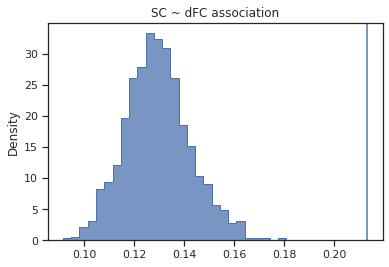

In [19]:
print('p =', ((corr_distrib >= scca_SC.corrs_.max()).sum() + 1) / (len(corr_distrib) + 1))

ax = sns.histplot(corr_distrib, stat='density', element='step')
ax.axvline(x=scca_SC.corrs_.max())
ax.set_title('SC ~ dFC association')
plt.show()

In [22]:
dFC, SC, FC, FCSC = preprocess(fcon.loc[subs_test], scon.loc[subs_test])

In [30]:
SC_score, dFC_score = scca_SC.transform(SC, dFC)

/home/kimsin98/mambaforge/envs/StructFunc/lib/python3.9/site-packages/gemmr/estimators/r_estimators.py:223: UserWarning: More than 1 mode selected: NOT TESTED
  warnings.warn('More than 1 mode selected: NOT TESTED')


In [35]:
corrs_test = [stats.pearsonr(SC_score[:, i], dFC_score[:, i])
              for i in range(len(scca_SC.corrs_))]

In [36]:
corrs_test[0][0]

[(0.19083213002354274, 1.5474329654179582e-05),
 (0.04311524713304098, 0.33309180468165206),
 (0.024127956656061576, 0.5881757473175143),
 (0.06449561614010518, 0.14741758548289027),
 (-0.07180441066153287, 0.10668182802255202),
 (-0.05927774183782812, 0.1830926392171232),
 (0.005603163518614127, 0.8999461957096845),
 (0.07940868498153761, 0.0743172063938701),
 (0.03895992784219503, 0.3818206918533282),
 (0.013339733532591698, 0.7646798118797424)]

In [52]:
scon.columns[~np.isclose(scca_SC.x_weights_[:, 0], 0)]

Index(['dmri_dtifullfa_fiberat_fxrh', 'dmri_dtifullfa_fiberat_cgclh',
       'dmri_dtifullfa_fiberat_atrrh', 'dmri_dtifullfa_fiberat_atrlh',
       'dmri_dtifullfa_fiberat_unclh', 'dmri_dtifullfa_fiberat_ilflh',
       'dmri_dtifullfa_fiberat_ifolh', 'dmri_dtifullfa_fiberat_fmin',
       'dmri_dtifullfa_fiberat_fxcutrh', 'dmri_dtifullfa_fiberat_allfibers',
       'dmri_dtifullfa_fiberat_allfccrh', 'dmri_dtifullfa_fiberat_allfcclh',
       'dmri_dtifullfa_fiberat_allfibrh', 'dmri_dtifullfa_fiberat_allfiblh',
       'dmri_dtifullmd_fiberat_fxrh', 'dmri_dtifullmd_fiberat_fxlh',
       'dmri_dtifullmd_fiberat_fmaj', 'dmri_dtifullmd_fiberat_cc',
       'dmri_dtifullmd_fiberat_fxcutrh', 'dmri_dtifullmd_fiberat_fxcutlh'],
      dtype='object')

In [54]:
fcon.columns[~np.isclose(scca_SC.y_weights_[:, 0], 0)]

Index(['rsfmri_c_ngd_ad_ngd_ad', 'rsfmri_c_ngd_ca_ngd_ca',
       'rsfmri_c_ngd_dt_ngd_cgc', 'rsfmri_c_ngd_dt_ngd_dt',
       'rsfmri_c_ngd_dla_ngd_dt', 'rsfmri_c_ngd_fo_ngd_cgc',
       'rsfmri_c_ngd_fo_ngd_fo', 'rsfmri_c_ngd_rspltp_ngd_cgc',
       'rsfmri_c_ngd_rspltp_ngd_dla', 'rsfmri_c_ngd_rspltp_ngd_rspltp',
       'rsfmri_c_ngd_smh_ngd_ad', 'rsfmri_c_ngd_smh_ngd_smh',
       'rsfmri_c_ngd_smm_ngd_ad', 'rsfmri_c_ngd_sa_ngd_rspltp',
       'rsfmri_c_ngd_vta_ngd_ad', 'rsfmri_c_ngd_vta_ngd_dt',
       'rsfmri_c_ngd_vta_ngd_smh'],
      dtype='object')